In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

In [2]:
movies = pd.read_json("movies.json")
movies.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [3]:
reviews = pd.read_json("reviews.json")
reviews.head()

,user_id,item_id,rating,timestamp
0,0,50,5,1997-12-04 15:55:49
1,0,172,5,1997-12-04 15:55:49
2,0,133,1,1997-12-04 15:55:49
3,196,242,3,1997-12-04 15:55:49
4,186,302,3,1998-04-04 19:22:22


In [4]:
reviews = reviews.drop(['timestamp'], axis=1)

In [5]:
reviews.head()

,user_id,item_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


In [6]:
merged_data = pd.merge(movies, reviews, on='item_id')

# Group by movie title and count the number of ratings for each movie
ratings_count = merged_data.groupby('item_id').size().reset_index(name='rating_count')

# Sort the DataFrame by the count of ratings in descending order
sorted_movies = ratings_count.sort_values(by='rating_count', ascending=False)

print(sorted_movies)

      item_id  rating_count
49         50           583
257       258           507
99        100           506
180       181           506
293       294           483
...       ...           ...
1573     1574             1
1574     1575             1
1575     1576             1
1576     1577             1
1681     1682             1

[1682 rows x 2 columns]


In [8]:
print(sorted_movies[sorted_movies['item_id'] == 1])

   item_id  rating_count
0        1           450


In [11]:
# Get the item_id with count
mostReviewed = 10
topN = sorted_movies.head(mostReviewed).reset_index()

In [ ]:
topOnlyDF = topOnlyDF.pivot(index='user_id', columns='item_id', values='rating')

In [12]:
t# Get a dataframe with only topN movies included
topOnlyDF = reviews[reviews["item_id"].isin(topN["item_id"])]

In [13]:
# People who don't review anything aren't useful to us. Let's drop them.
topOnlyDF = topOnlyDF.dropna(axis=0, how='all')

In [14]:
# The people who are left might still have NaNs. Let's fill those with a number so we can cluster!
topOnlyDF = topOnlyDF.fillna(-1)

In [15]:
topOnlyDF.head()

,user_id,item_id,rating
0,0,50,5
53,251,100,4
188,26,258,3
267,66,258,4
378,207,258,4


In [16]:
agg = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agg = agg.fit(topOnlyDF)
agg.labels_

array([2, 4, 2, ..., 0, 0, 0], dtype=int64)

In [17]:
from sklearn.metrics import silhouette_score

In [18]:
# We want something as close to 1 as possible
ss_avg = silhouette_score(topOnlyDF, agg.labels_)

In [19]:
ss_avg # Can we do better?

0.34374860486957076

In [20]:
scores = {}
clusters = len(topOnlyDF)
for i in range(2, clusters):
    agg = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    agg = agg.fit(topOnlyDF)
    ss_avg = silhouette_score(topOnlyDF, agg.labels_)
    scores[i] = ss_avgscores = {}
clusters = len(topOnlyDF)
for i in range(2, clusters):
    agg = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    agg = agg.fit(topOnlyDF)
    ss_avg = silhouette_score(topOnlyDF, agg.labels_)
    scores[i] = ss_avg

<AxesSubplot:>

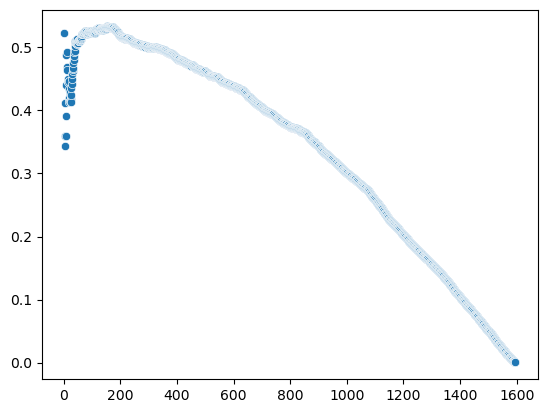

In [21]:
import seaborn as sns
sns.scatterplot(x=scores.keys(), y=scores.values()) # Somewhere around 180

In [22]:
# choose a n_cluster value
agg = AgglomerativeClustering(n_clusters=180, affinity='euclidean', linkage='ward')
agg = agg.fit(topOnlyDF)

In [23]:
topOnlyDF["clusters"] = agg.labels_
topOnlyDF.reset_index(inplace=True)
topOnlyDF.head()

,index,user_id,item_id,rating,clusters
0,0,0,50,5,48
1,53,251,100,4,84
2,188,26,258,3,127
3,267,66,258,4,4
4,378,207,258,4,8


In [24]:
# Let's look at a specific user right now
user = 365
topOnlyDF[topOnlyDF['user_id'] == user]

,index,user_id,item_id,rating,clusters
140,8086,365,258,4,38
551,35119,365,100,5,123


In [26]:
# Now, let's get users in same cluster
cluster = 38
user_ids = topOnlyDF[topOnlyDF['clusters'] == cluster]
user_ids

,index,user_id,item_id,rating,clusters
140,8086,365,258,4,38
164,9420,362,258,4,38
180,10520,357,258,4,38
293,18488,367,258,4,38
324,20271,363,258,3,38
506,32446,354,258,4,38
537,34519,361,258,3,38
541,34565,350,258,3,38
593,37805,353,258,5,38
1169,73277,356,258,5,38
